# Weather Analysis of World War 2

Allied bombing raids during World War II turned the English sky white with contrails, providing a case study for modern scientists studying how the weather is affected by these long, feathery lines of condensation that form behind aircraft. 

Researchers focused on larger bombing raids between 1943 to 1945 after the United States Army Air Force (USAAF) joined the air campaign against Adolf Hitler's forces. Civil aviation was rare in the 1940s, so these combat missions represented a huge increase in flights and in potentially weather-altering contrails.

Through this dataset, we are trying to analyze the weather variation during World War 2

### Importing Libraries

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import os
import pandas_profiling as pp
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
%matplotlib inline

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [3]:
os.getcwd()

'C:\\Users\\i520487\\OneDrive - Temple University\\Python'

In [5]:
os.chdir(r"C:\Users\i520487\OneDrive - Temple University\Python\Linear_Regression") 

### Loading the dataset

In [6]:
data = pd.read_csv("Weather.csv", encoding='latin', low_memory=False) 
data.tail(2)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119039,82506,1945-12-31,0,NaN,29.444444,17.222222,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding the Rows and Columns in the dataset

In [7]:
data.shape

(119040, 31)

In [8]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [9]:
data.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


### Null Values

In [10]:
data.isnull().sum()

STA            0     
Date           0     
Precip         0     
WindGustSpd    118508
MaxTemp        0     
MinTemp        0     
MeanTemp       0     
Snowfall       1163  
PoorWeather    84803 
YR             0     
MO             0     
DA             0     
PRCP           1932  
DR             118507
SPD            118508
MAX            474   
MIN            468   
MEA            498   
SNF            1163  
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF     84803 
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

#### Remove columns which were containing mostly NULL and also removed MIN, MAX, MEA as there are in fahrenhite  

In [11]:
data=data[['STA','Date','Precip','MaxTemp','MinTemp','MeanTemp','Snowfall',
           'PoorWeather','YR','MO','DA','SNF','TSHDSBRSGF']]

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 13 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
SNF            117877 non-null object
TSHDSBRSGF     34237 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 11.8+ MB


#### Exploratory Analysis using Panada _ Profiling

In [12]:
pp.ProfileReport(data)

#### Distribution of Max Temperature with respect to Min Temperature

We Can see from the graph that there seems to be strong positice relationship between min and max temperture

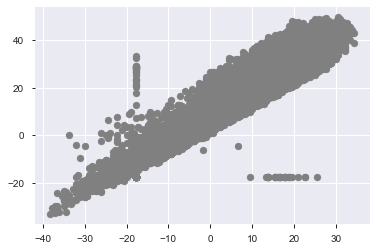

In [33]:
plt.scatter(data.MinTemp, data.MaxTemp,  color='gray')

#### Correlation Matrix 

We can see from the correlation matrix that there is a high correlation among min, max, mean temperature

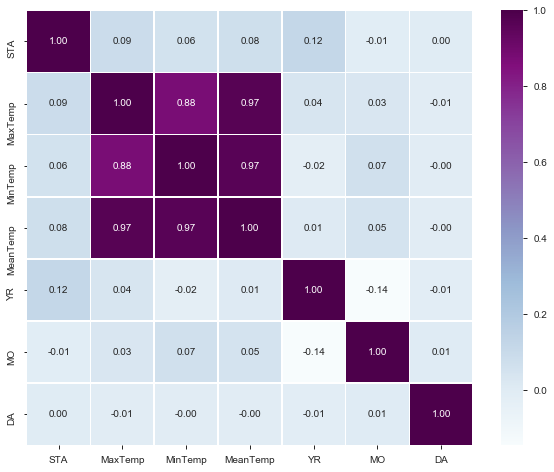

In [16]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax, cmap="BuPu")
plt.show()

#### Distribition of Max Temperature

Max Temperature distribution can be considered as Normal

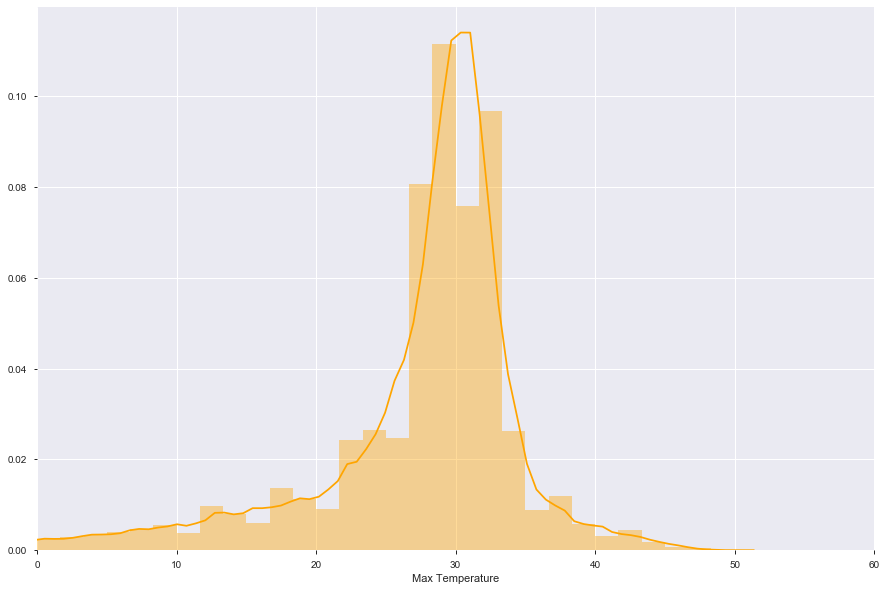

In [17]:
plt.figure(figsize=(15,10))
sns.distplot(data['MaxTemp'], color='orange')
plt.xlabel('Max Temperature')
plt.xlim(0,60)
plt.show()

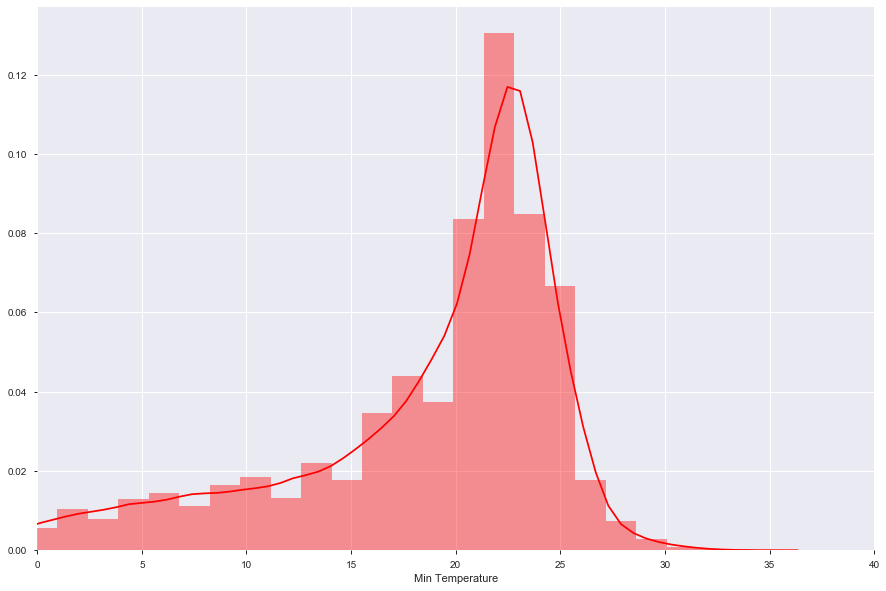

In [28]:
plt.figure(figsize=(15,10))
sns.distplot(data['MinTemp'], color='Red')
plt.xlabel('Min Temperature')
plt.xlim(0,40)
plt.show()

#### Reshaping the data before the regression model

In [19]:
X = data['MinTemp'].values.reshape(-1,1)
y = data['MaxTemp'].values.reshape(-1,1)

#### Spliting the dataset into test and train

We have considered 80% of the data as train and 20% as test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Brief view of the data after spliting 

In [21]:
X_train

array([[22.22222222],
       [17.77777778],
       [-9.44444444],
       ...,
       [ 3.33333333],
       [10.        ],
       [15.55555556]])

#### Training the test dataset on the regression model

In [22]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Finding intercept and Coefficient

In [23]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


#### Predicting the value of test data based on trained model

In [24]:
y_pred = regressor.predict(X_test)
y_pred

array([[33.67035117],
       [30.0912513 ],
       [26.51215143],
       ...,
       [32.64775121],
       [30.60255128],
       [31.62515124]])

#### Comparing the resultset

In [25]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(10)

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
5,37.222222,30.602551
6,22.222222,11.684452
7,35.555556,33.670351
8,30.555556,30.602551
9,28.888889,32.647751


#### Visualizing the variation in the actual V/S Predicted

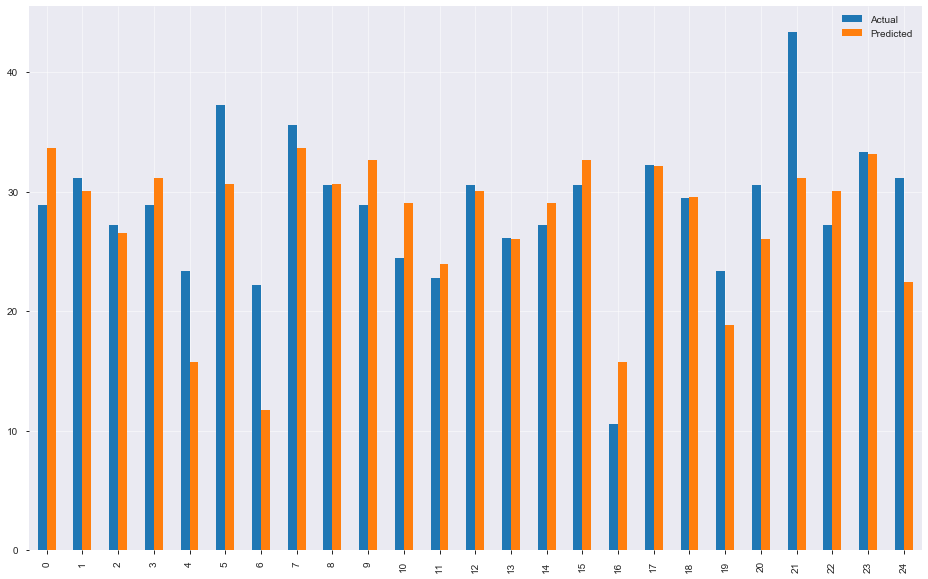

In [26]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='both', linestyle='-', linewidth='0.5')
plt.show()

#### Predicted values distribution and spread

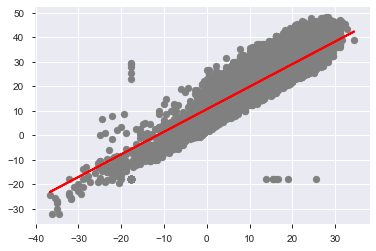

In [46]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

#### Efficiency of the model

Our model have a very low RMSE 

In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1993291783785835
Mean Squared Error: 17.631568097568532
Root Mean Squared Error: 4.198996082109215


#### R2

In [47]:
r2_score(y_test, y_pred,multioutput='variance_weighted') 

0.7670218843587763

This model explains 76% of the variability in the Max temperature and we can improve the afficency of the model by including other varuables into the cosideration for the model

Thanks for reviewing this notebook.
I will keep on updating the analysis